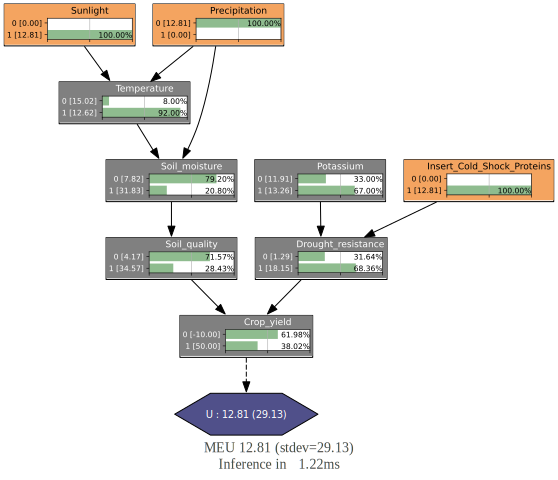

In [25]:
from pylab import *
import matplotlib.pyplot as plt
import pyAgrum as gum
import os
import pyAgrum.lib.notebook as gnb
import io

dn = gum.InfluenceDiagram()
chance_var_names = ["Precipitation", "Sunlight", "Temperature", "Soil_moisture", "Soil_quality", "Potassium", "Drought_resistance", "Crop_yield"]
precipitation, sunlight, temperature, soil_moisture, soil_quality, potassium, drought_resistant, yied = [
 dn.add(gum.LabelizedVariable(name, name, 2))
 for name in chance_var_names]
gmo = dn.addDecisionNode(gum.LabelizedVariable("Insert_Cold_Shock_Proteins",
 "Insert_Cold_Shock_Proteins", 2))
u = dn.addUtilityNode(gum.LabelizedVariable("U", "U", 1))

dn.addArc(precipitation, temperature)
dn.addArc(precipitation, soil_moisture)
dn.addArc(sunlight, temperature)
dn.addArc(temperature, soil_moisture)
dn.addArc(soil_moisture, soil_quality)
dn.addArc(soil_quality, yied)
dn.addArc(potassium, drought_resistant)
dn.addArc(gmo, drought_resistant)
dn.addArc(drought_resistant, yied)
dn.addArc(yied, u)

dn.cpt("Precipitation").fillWith([0.33,0.67])
dn.cpt("Sunlight").fillWith([0.52,0.48])
dn.cpt("Temperature")[{'Precipitation': 0, 'Sunlight': 0}] = [0.28, 0.72]
dn.cpt("Temperature")[{'Precipitation': 0, 'Sunlight': 1}] = [0.08, 0.92]
dn.cpt("Temperature")[{'Precipitation': 1, 'Sunlight': 0}] = [0.32, 0.68]
dn.cpt("Temperature")[{'Precipitation': 1, 'Sunlight': 1}] = [0.18, 0.82]
dn.cpt("Soil_moisture")[{'Precipitation': 0, 'Temperature': 0}] = [0.7, 0.3]
dn.cpt("Soil_moisture")[{'Precipitation': 0, 'Temperature': 1}] = [0.8, 0.2]
dn.cpt("Soil_moisture")[{'Precipitation': 1, 'Temperature': 0}] = [0.13, 0.87]
dn.cpt("Soil_moisture")[{'Precipitation': 1, 'Temperature': 1}] = [0.28, 0.72]
dn.cpt("Soil_quality")[:]=[[0.88,0.12],
                         [0.42,0.58]]

dn.cpt("Potassium").fillWith([0.33, 0.67])

dn.cpt("Drought_resistance")[{'Insert_Cold_Shock_Proteins': 0, 'Potassium': 0}] = [0.90, 0.10]
dn.cpt("Drought_resistance")[{'Insert_Cold_Shock_Proteins': 0, 'Potassium': 1}] = [0.41, 0.59]
dn.cpt("Drought_resistance")[{'Insert_Cold_Shock_Proteins': 1, 'Potassium': 0}] = [0.37, 0.63]
dn.cpt("Drought_resistance")[{'Insert_Cold_Shock_Proteins': 1, 'Potassium': 1}] = [0.29, 0.71]


dn.cpt("Crop_yield")[{'Soil_quality': 0, 'Drought_resistance': 0}] = [0.88, 0.12]
dn.cpt("Crop_yield")[{'Soil_quality': 0, 'Drought_resistance': 1}] = [0.71, 0.29]
dn.cpt("Crop_yield")[{'Soil_quality': 1, 'Drought_resistance': 0}] = [0.64, 0.36]
dn.cpt("Crop_yield")[{'Soil_quality': 1, 'Drought_resistance': 1}] = [0.08, 0.92]
dn.utility("U")[{'Crop_yield': 0}] = -10
dn.utility("U")[{'Crop_yield':1}] = 50

gnb.showInference(dn, evs={'Precipitation':0,'Sunlight':1,'Insert_Cold_Shock_Proteins':1})